In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("/Users/katieli/Research/wheelchair/src")

from cycle_detection import *
from plots import *
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set styling
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

In [4]:
df = pd.read_csv("/Users/katieli/Research/wheelchair/data/raw/SubMax/HYB/ALP_submax_HYB.csv")

In [5]:
df['moment_z_total[Nm]'] = df['moment_z_R[Nm]'] + df['moment_z_L[Nm]']

Analyzing 56 cycles...
Selected 40 steady-state cycles
Mean internal RMSD: 12.70
Excluded 16 cycles (likely acceleration/deceleration)


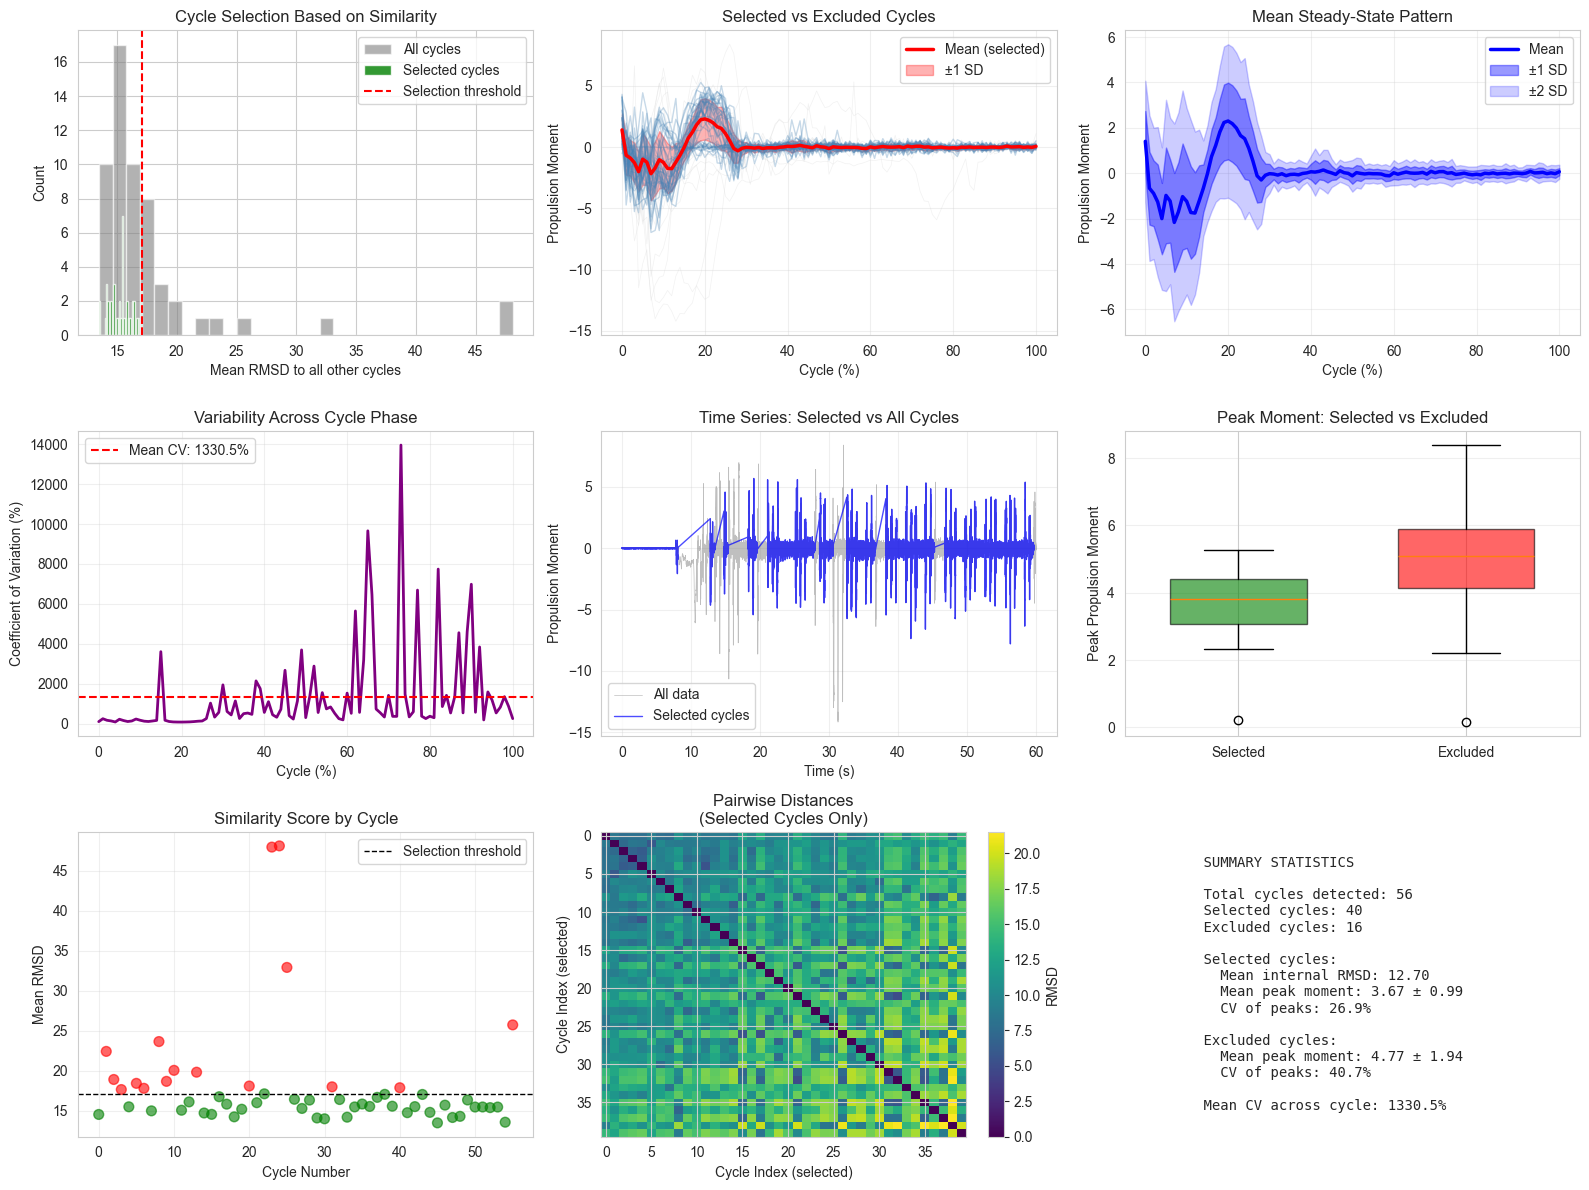

In [6]:
# Example with your column names

sub6Mx = df[df['time[sec]'] < 60]

results = find_steady_state_cycles(
    sub6Mx, 
    cycle_col='cycle[count]',  # replace with your cycle ID column
    time_col='time[sec]',    # replace with your time column
    moment_col='moment_z_total[Nm]', # replace with your propulsion moment column
    n_select=40
)

# Generate plots
fig1 = plot_cycle_selection_analysis(sub6Mx, results, 
                                     time_col='time[sec]', 
                                     moment_col='moment_z_total[Nm]',
                                     cycle_col='cycle[count]')
plt.savefig('cycle_analysis_summary.png', dpi=300, bbox_inches='tight')
plt.show()

Analyzing 67 cycles...
Selected 40 steady-state cycles
Mean internal RMSD: 12.87
Excluded 27 cycles (likely acceleration/deceleration)


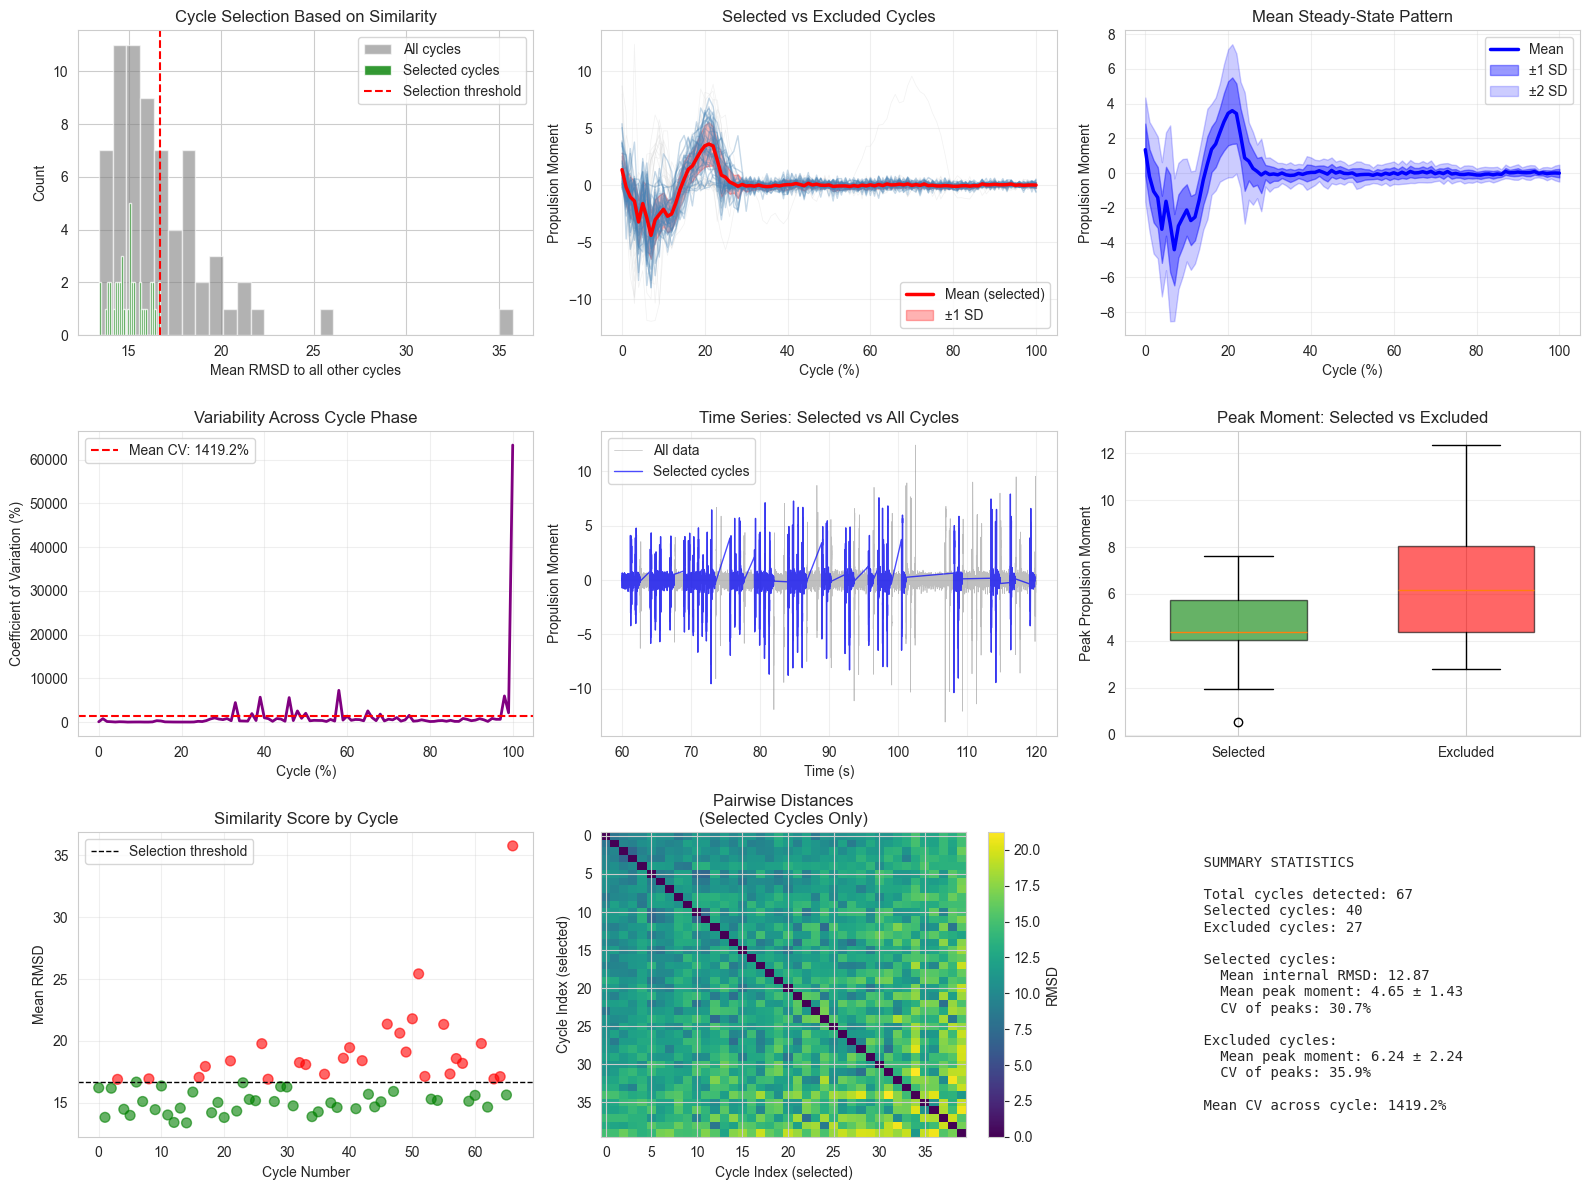

In [7]:
sub70Mx = df[(60 < df['time[sec]']) & (df['time[sec]'] < 120)]

results = find_steady_state_cycles(
    sub70Mx, 
    cycle_col='cycle[count]',  # replace with your cycle ID column
    time_col='time[sec]',    # replace with your time column
    moment_col='moment_z_total[Nm]', # replace with your propulsion moment column
    n_select=40
)

# Generate plots
fig1 = plot_cycle_selection_analysis(sub70Mx, results, 
                                     time_col='time[sec]', 
                                     moment_col='moment_z_total[Nm]',
                                     cycle_col='cycle[count]')
plt.savefig('cycle_analysis_summary_70.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
results["selected_cycle_ids"]

array([ 69,  67,  75,  56,  89,  60,  66,  73,  90,  77,  64,  59,  96,
        68,  93, 117,  99,  86,  92,  74, 100,  83,  62, 114,  80, 109,
        79, 108, 115, 120,  98,  70, 102,  57,  55,  85,  84,  65,  78,
        61])

Analyzing 76 cycles...
Selected 40 steady-state cycles
Mean internal RMSD: 14.70
Excluded 36 cycles (likely acceleration/deceleration)


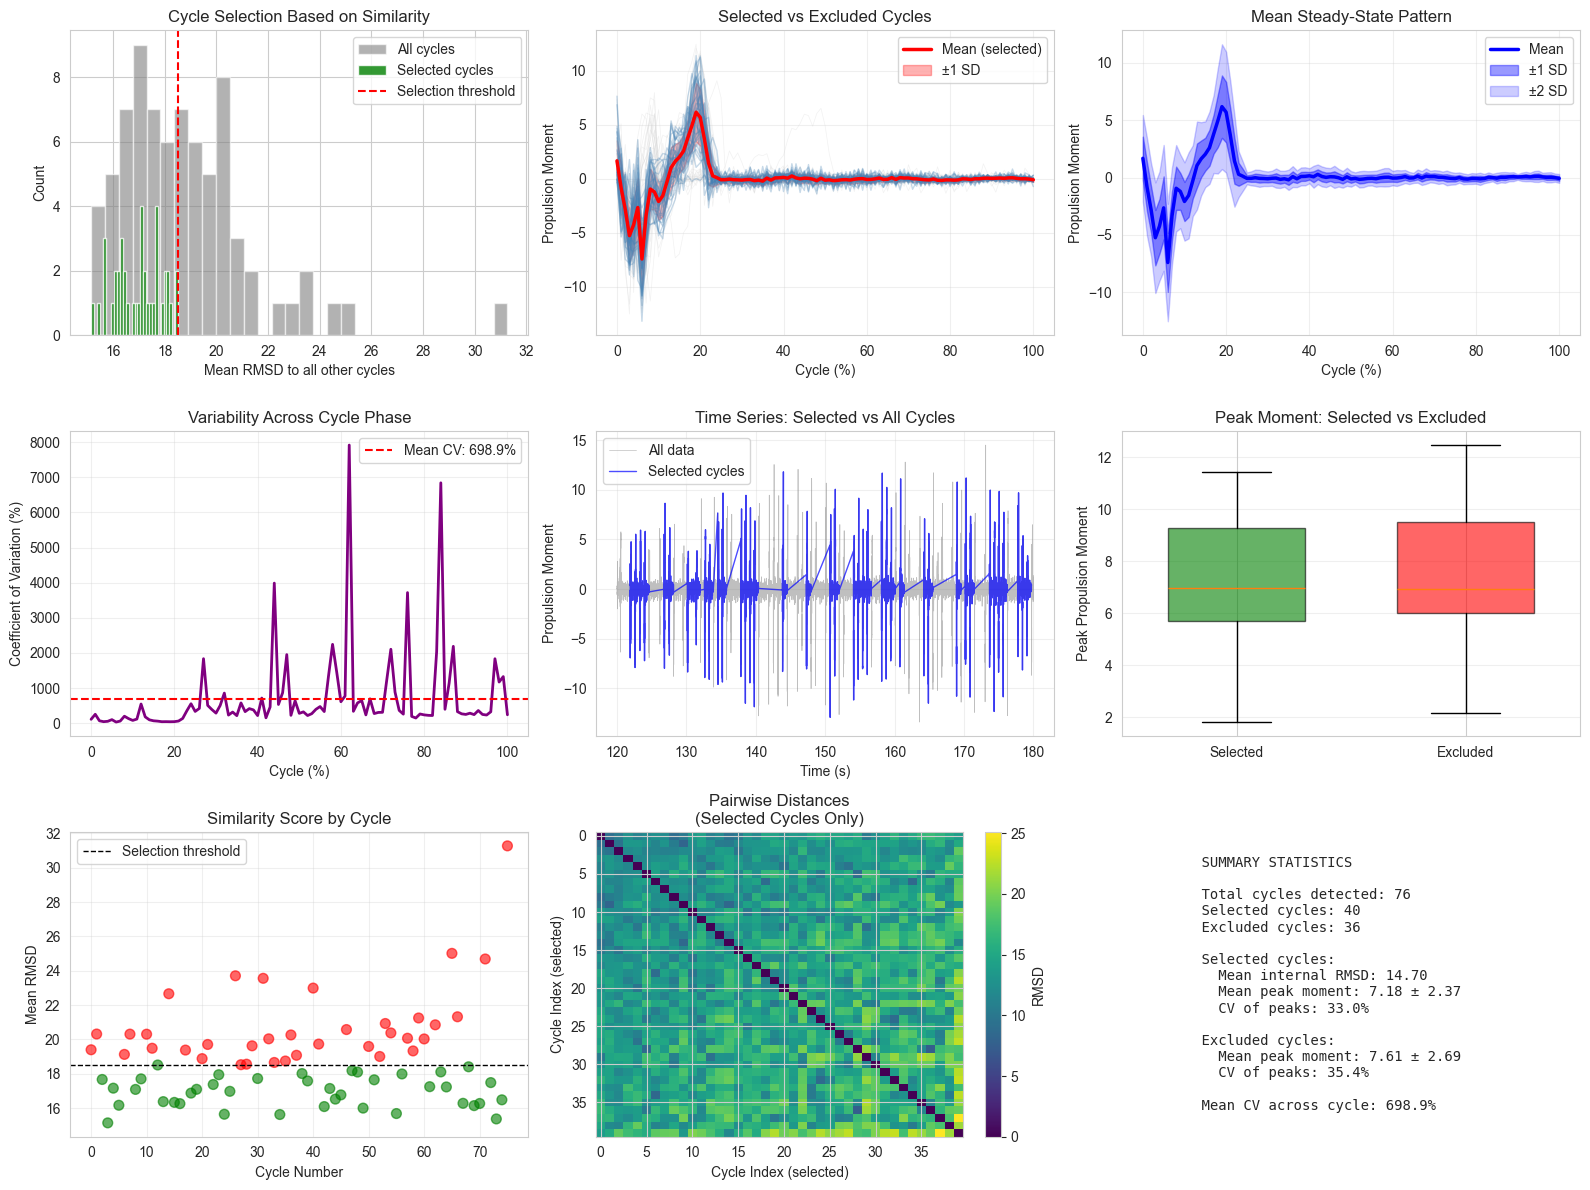

In [9]:
sub70Mx = df[(120 < df['time[sec]']) & (df['time[sec]'] < 180)]

results = find_steady_state_cycles(
    sub70Mx, 
    cycle_col='cycle[count]',  # replace with your cycle ID column
    time_col='time[sec]',    # replace with your time column
    moment_col='moment_z_total[Nm]', # replace with your propulsion moment column
    n_select=40
)

# Generate plots
fig1 = plot_cycle_selection_analysis(sub70Mx, results, 
                                     time_col='time[sec]', 
                                     moment_col='moment_z_total[Nm]',
                                     cycle_col='cycle[count]')
plt.savefig('cycle_analysis_summary_80.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# next steps brainstorm before 8pm
# time periods: 0-60, 60-120, 120-180 (non-inclusive)
"""For a given person, the glove material, time period

percent_effort = [60, 70, 80]

- calculate the cycles
- save the cycle plot into: f"data/processed/submax_{person}_{material}_{effort}vMxS.png", for reference
- cut the data to the cycles-only

  df_new = results['selected_cycle_ids']


- process the kinematics, and other calculations
- save these to an excel file / CSVs
"""

print("")

In [11]:
results['selected_cycle_ids']

array([124, 194, 155, 145, 176, 170, 163, 190, 126, 137, 191, 188, 136,
       134, 195, 165, 166, 139, 146, 129, 140, 164, 125, 185, 182, 143,
       193, 160, 172, 123, 130, 151, 144, 177, 159, 169, 184, 168, 189,
       133])

In [12]:
df[df["cycle[count]"].isin(results['selected_cycle_ids'])].describe()

,time[sec],cycle[count],acc_x_R[m/s2],acc_y_R[m/s2],gyro_z_R[rad/s],force_x_R[N],force_y_R[N],force_z_R[N],moment_x_R[Nm],moment_y_R[Nm],...,moment_z_L[Nm],speed_L[km/h],distance_L[km],theta_cop_L[deg],tangential_force_L[N],radial_force_L[N],axle_force_L[N],phi_cop_L[deg],m_copz_L[Nm],moment_z_total[Nm]
count,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,...,10655.000000,10655.000000,10655.000000,2210.000000,2210.000000,2210.000000,10655.000000,2210.000000,2210.000000,10655.000000
mean,150.383999,158.376631,0.790597,-0.284817,-25.044091,1.862163,-4.129463,19.082974,-0.548663,-0.017033,...,-2.414920,29.881220,0.991609,113.750229,91.047939,76.357222,22.008265,28.575955,-0.057185,0.008709
std,18.283440,23.033096,7.747436,7.719421,1.188202,47.899580,58.771132,42.785134,6.335553,5.155531,...,6.072273,1.418041,0.154348,55.486465,54.449313,76.297537,47.184071,32.250649,3.184483,1.962226
min,121.905000,123.000000,-25.104177,-28.016080,-26.584078,-299.071094,-308.549465,-80.444246,-29.780862,-29.629728,...,-26.903940,25.940982,0.757483,5.346652,-31.645728,-218.091854,-55.143164,-79.964998,-10.640723,-12.913292
25%,133.376250,137.000000,-5.425314,-6.265920,-25.856156,-3.535730,-3.963693,-0.932301,-0.404943,-0.228069,...,-0.329182,29.033926,0.845268,65.995436,39.611605,30.872393,-0.975409,14.592510,-2.449722,-0.272670
50%,151.695000,160.000000,0.826045,-0.546560,-25.575203,-0.712913,-0.651599,0.532743,-0.103636,0.032411,...,-0.080071,30.498870,1.001538,113.221294,109.320373,88.950253,0.455191,40.745785,-0.265091,-0.012058
75%,165.348750,177.000000,7.131597,6.627040,-24.359870,2.299161,1.976420,3.329646,0.190256,0.276612,...,0.097865,30.842814,1.118016,164.577180,137.088159,127.745724,3.381421,52.740565,2.270223,0.261357
max,179.725000,195.000000,36.314751,27.337760,-21.656765,307.409530,305.435381,210.966367,29.029661,28.004938,...,8.425275,31.902669,1.240796,354.759326,178.374752,222.524288,228.375935,74.803396,10.761016,11.808243


In [13]:
df.describe()

,time[sec],cycle[count],acc_x_R[m/s2],acc_y_R[m/s2],gyro_z_R[rad/s],force_x_R[N],force_y_R[N],force_z_R[N],moment_x_R[Nm],moment_y_R[Nm],...,moment_z_L[Nm],speed_L[km/h],distance_L[km],theta_cop_L[deg],tangential_force_L[N],radial_force_L[N],axle_force_L[N],phi_cop_L[deg],m_copz_L[Nm],moment_z_total[Nm]
count,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,...,81491.000000,81491.000000,81491.000000,14066.000000,14066.000000,14066.000000,81491.000000,14066.000000,14066.000000,81491.000000
mean,101.862500,103.602668,1.027685,0.014568,-21.053568,0.903995,-1.024366,13.582015,-0.235400,-0.061079,...,-1.910244,25.113271,0.637568,108.967755,81.761780,60.841487,15.158937,25.306088,0.524094,-0.060083
std,58.811424,66.505317,7.379572,7.463640,5.777643,42.512173,42.766762,34.706434,4.667405,4.452004,...,5.588656,6.901496,0.435290,55.922875,57.379559,68.268109,38.058129,33.092271,3.018623,1.599471
min,0.000000,0.000000,-38.389407,-37.737040,-26.837362,-345.665264,-331.328759,-80.444246,-32.761869,-32.117968,...,-40.747369,-0.086623,-0.000114,0.802752,-72.725483,-253.299629,-62.556278,-83.151420,-18.454908,-14.160387
25%,50.931250,45.000000,-5.028576,-5.938960,-25.294251,-3.146851,-2.904747,-0.599336,-0.326928,-0.170728,...,-0.231317,23.191982,0.252271,56.891142,25.653856,1.116751,-0.780328,1.069496,-1.528171,-0.233048
50%,101.862500,104.000000,1.534704,0.034160,-22.391073,-0.711029,-0.320224,0.466151,-0.078261,0.019933,...,-0.053381,26.702753,0.609790,103.973413,90.469005,64.927297,0.260110,36.798765,0.252612,-0.012066
75%,152.793750,162.000000,7.510321,6.246400,-19.447456,1.629889,1.597469,2.130974,0.120999,0.230081,...,0.071174,30.182952,1.010959,159.385806,131.063502,110.314251,1.950820,52.939876,2.489158,0.193012
max,203.725000,211.000000,40.054725,30.787920,0.038312,335.074543,325.685009,227.414818,31.743103,31.398994,...,8.638798,32.345974,1.421184,359.159839,233.241351,276.555082,228.896153,74.803396,14.967823,14.504171


In [14]:
from submax_process import steady_state_cycle_calculations

In [15]:
temp = steady_state_cycle_calculations(df, "60%")

hello
Analyzing 56 cycles...
Selected 40 steady-state cycles
Mean internal RMSD: 12.70
Excluded 16 cycles (likely acceleration/deceleration)
Selected cycle ids: [45 54 30 29 47 33 18 48  0 15 14 41 44  7 11 19 27 52 53 50 51 34  4 42
 36 39 46 17 35 21 12 28 49 32 26 37 16 43 38 22]
Unique cycle ids: 40


In [18]:
temp["kinetics"].index

Index([ 4,  7, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 26, 27, 28, 29, 30, 32,
       33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54],
      dtype='int64', name='cycle[count]')

In [23]:
selected = temp["selected_cycle_ids"]
selected.sort()

In [24]:
selected

array([ 0,  4,  7, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 26, 27, 28, 29,
       30, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54])

In [25]:
len(selected)

40

In [26]:
len(temp["kinetics"].index)

39

In [32]:
df_left

,time[sec],cycle[count],acc_x_R[m/s2],acc_y_R[m/s2],gyro_z_R[rad/s],force_x_R[N],force_y_R[N],force_z_R[N],moment_x_R[Nm],moment_y_R[Nm],...,distance_L[km],theta_cop_L[deg],tangential_force_L[N],radial_force_L[N],axle_force_L[N],phi_cop_L[deg],m_copz_L[Nm],moment_z_total[Nm],total_force_L[N],power_z_L[W]
3251,8.1275,1,7.500567,5.72424,-0.012771,2.007412,2.969840,8.457300,-1.013056,-0.513198,...,-0.000091,53.316375,2.022251,-1.173905,10.209289,-6.559293,0.072816,0.101019,10.473640,0.015149
3253,8.1325,1,7.539612,5.91944,-0.017027,2.379424,2.172215,9.323008,-1.194406,-0.508164,...,-0.000091,50.853835,2.097208,-1.155424,10.534425,-6.259227,0.120044,0.178900,10.803120,0.014969
3254,8.1350,1,7.442012,5.96336,-0.017027,2.859995,1.747041,10.321902,-1.269960,-0.607708,...,-0.000091,51.794368,2.459511,-1.557003,10.404370,-8.511095,0.080704,0.183800,10.803906,0.017630
3255,8.1375,1,7.339532,5.89992,-0.017027,3.072178,1.962229,10.921239,-1.335434,-0.498135,...,-0.000091,48.944529,2.681382,-1.911454,10.664480,-10.161543,0.080244,0.175354,11.161299,0.017062
3256,8.1400,1,7.432245,5.99264,-0.010642,3.230656,1.964080,10.255310,-1.335404,-0.682315,...,-0.000091,53.546202,2.482971,-1.955627,10.794535,-10.268795,0.130395,0.180104,11.247738,0.015480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76831,192.0775,211,9.745827,-8.46192,-25.307021,-58.794101,36.466143,28.035619,4.784210,3.637416,...,1.345967,194.295842,18.362826,79.852028,52.997263,56.428034,-3.386743,2.627365,97.582015,14.882505
76832,192.0800,211,10.781590,-10.39928,-25.353847,-41.819455,25.167225,14.250885,2.484183,1.763570,...,1.345988,189.056433,15.586331,62.432996,47.339887,52.828737,-4.784499,2.848777,79.886654,62.581628
76833,192.0825,211,12.342341,-10.18944,-25.385773,-29.407444,18.327592,6.259734,0.804416,1.224135,...,1.346009,197.442561,2.030253,51.032162,34.984696,55.567721,-4.170568,3.535509,61.905836,97.822651
76834,192.0850,211,11.023230,-8.63760,-25.421956,-9.865839,2.449576,2.130974,0.853407,-0.106892,...,1.346031,191.932415,1.683616,35.589488,27.441527,52.365725,-3.580935,2.372760,44.972032,84.616494


In [36]:
df[df["cycle[count]"] == 0]['theta_cop_R[deg]']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3246   NaN
3247   NaN
3248   NaN
3249   NaN
3250   NaN
Name: theta_cop_R[deg], Length: 3251, dtype: float64

In [29]:
from kinetics_calculations import *
df_left = load_cycle_data_from_df(df, "L")
df_left = compute_force_columns(df_left, "L")
agg_df_left = aggregate_per_cycle(df_left, "L")

# # right side
df_right = load_cycle_data_from_df(df, "R")
df_right = compute_force_columns(df_right, "R")
agg_df_right = aggregate_per_cycle(df_right, "R")


# put it all together into one aggregate datafarme
full_df = pd.concat([agg_df_left, agg_df_right], axis=1)

# calculate the averages
result_df = get_averages_from_l_r(full_df)


In [31]:
result_df

,tangential_force_L_pos[N],tangential_force_L_neg[N],tangential_force_L_pos_peak[N],tangential_force_L_neg_peak[N],radial_force_L_pos[N],radial_force_L_neg[N],radial_force_L_pos_peak[N],radial_force_L_neg_peak[N],axle_force_L_pos[N],axle_force_L_neg[N],...,axle_force_avg_pos[N],axle_force_avg_neg[N],axle_force_avg_pos_peak[N],axle_force_avg_neg_peak[N],moment_z_avg_pos[Nm],moment_z_avg_neg[Nm],moment_z_avg_pos_peak[Nm],moment_z_avg_neg_peak[Nm],total_force_avg[N],total_force_avg_peak[N]
cycle[count],,,,,,,,,,,,,,,,,,,,,
1,34.733314,-3.254431,226.088603,-5.605946,45.986269,-3.850002,122.889648,-33.067432,43.783946,NaN,...,41.430399,0.0,208.842173,0.0,6.254195,-3.240414,18.610396,-21.178898,57.356539,298.194879
2,123.260698,-8.336681,195.003745,-12.460909,83.112200,-37.049974,140.767340,-65.452994,102.034138,NaN,...,104.858207,0.0,166.895660,0.0,10.633549,-11.213080,16.287502,-17.740271,180.348645,264.856790
3,133.393573,-7.909191,213.864192,-12.964226,80.977735,-39.474365,155.195727,-71.119253,95.837481,NaN,...,100.811216,0.0,166.132190,0.0,10.776272,-11.327173,18.310611,-18.440481,180.547288,272.620742
4,135.901326,-6.624000,233.241351,-11.297445,89.712347,-28.973671,167.857223,-52.272416,105.102815,NaN,...,100.459810,0.0,167.513165,0.0,10.757408,-11.282806,18.753780,-19.188219,180.545378,293.035360
5,120.651993,-4.629157,202.080952,-6.884624,97.504253,-25.704962,171.990068,-77.649659,98.802183,NaN,...,96.200814,0.0,153.028931,0.0,9.814796,-10.130567,17.011670,-17.152032,175.608149,280.547626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,94.889089,-14.309550,152.862470,-23.274896,100.019775,-38.932301,216.230599,-110.769382,99.927718,NaN,...,101.542793,0.0,165.940968,0.0,8.043818,-8.010164,12.594030,-13.759214,179.820221,289.173571
208,97.499937,-7.346560,161.740207,-15.838251,107.300188,-44.763338,215.947955,-169.985635,107.005517,NaN,...,105.509869,0.0,167.121800,0.0,8.397903,-7.524472,13.577872,-13.994016,186.351242,319.956667
209,97.297803,-18.523399,151.038983,-72.725483,110.591656,-69.364528,181.093273,-153.777806,109.323924,NaN,...,106.265820,0.0,172.651670,0.0,8.579780,-7.480244,14.178850,-13.766222,186.195205,302.204056
